## A first look at the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset
print(df.head())

         date       bitcoin     ethereum     solana   polkadot  avalanche-2  \
0  2021-03-28  55832.418110  1713.837876  16.566437  32.623519    27.671571   
1  2021-03-29  55728.101328  1689.036798  18.008070  32.170751    28.624517   
2  2021-03-30  57634.928694  1817.626388  18.884891  34.326400    29.600559   
3  2021-03-31  58668.628337  1840.294952  19.175756  33.925086    29.621858   
4  2021-04-01  58817.373888  1915.832536  19.486632  36.888470    28.649511   

       tron  thorchain    ripple   vechain  ...  chainlink  the-graph  \
0  0.063796   6.236240  0.547868  0.089135  ...  26.854948   1.465659   
1  0.063515   6.162729  0.550851  0.091082  ...  26.681959   1.807917   
2  0.064774   6.687653  0.565819  0.091946  ...  28.032733   1.770697   
3  0.065801   7.283715  0.566569  0.089512  ...  27.769168   1.764523   
4  0.091904   7.943803  0.573818  0.087928  ...  29.189755   1.717220   

     arweave    filecoin   siacoin      ankr  render-token    uniswap  \
0  29.488949 

In [3]:
#Select only the backtest period
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.loc['2022-01-01':'2024-01-01']

In [ ]:
#transform data to returns
returns = df.pct_change().dropna()


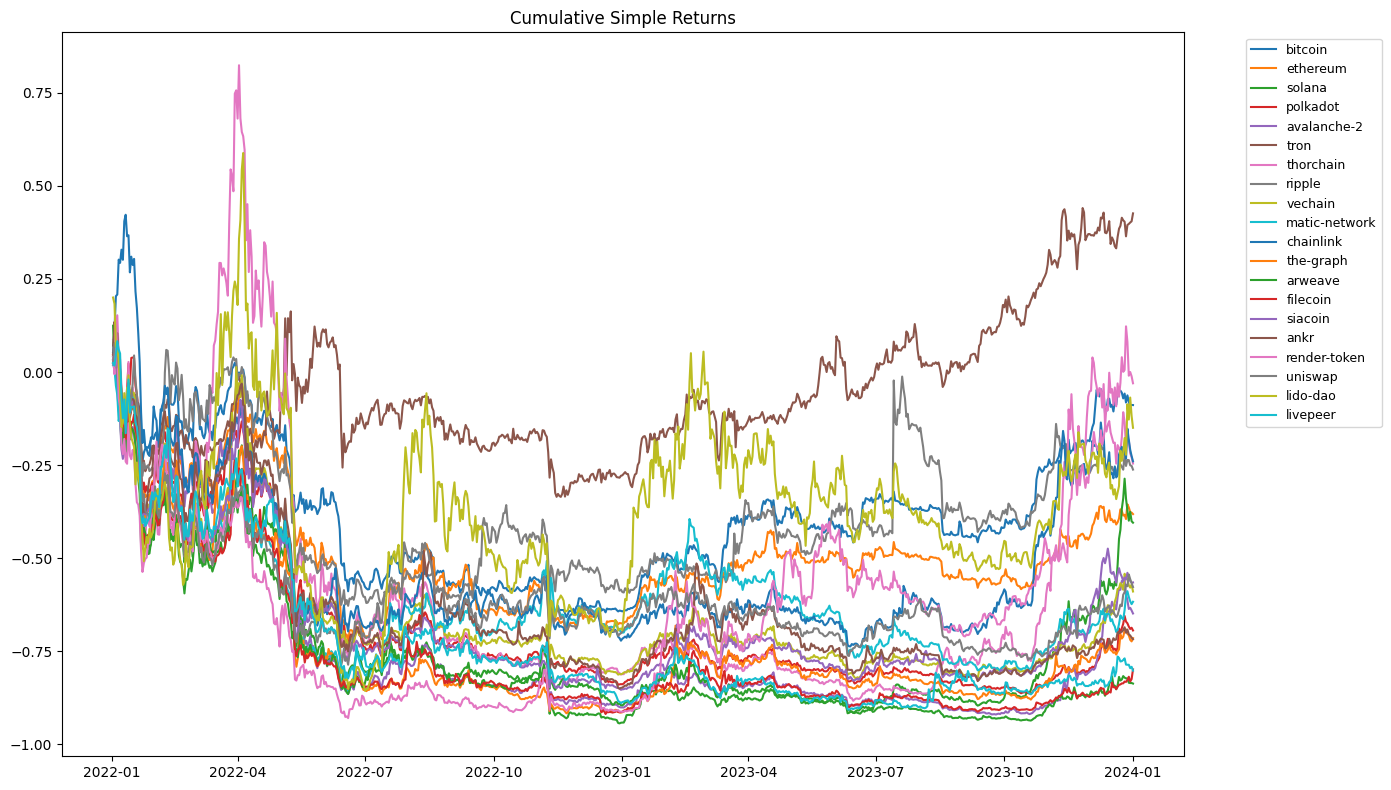

In [5]:
# plot cumulative simple returns
cum_returns = (1 + returns).cumprod() - 1 
cum_returns = cum_returns.dropna(how="all")

plt.figure(figsize=(14,8))
for col in cum_returns.columns:
    plt.plot(cum_returns.index, cum_returns[col], label=col, linewidth=1.5)
plt.title("Cumulative Simple Returns")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()


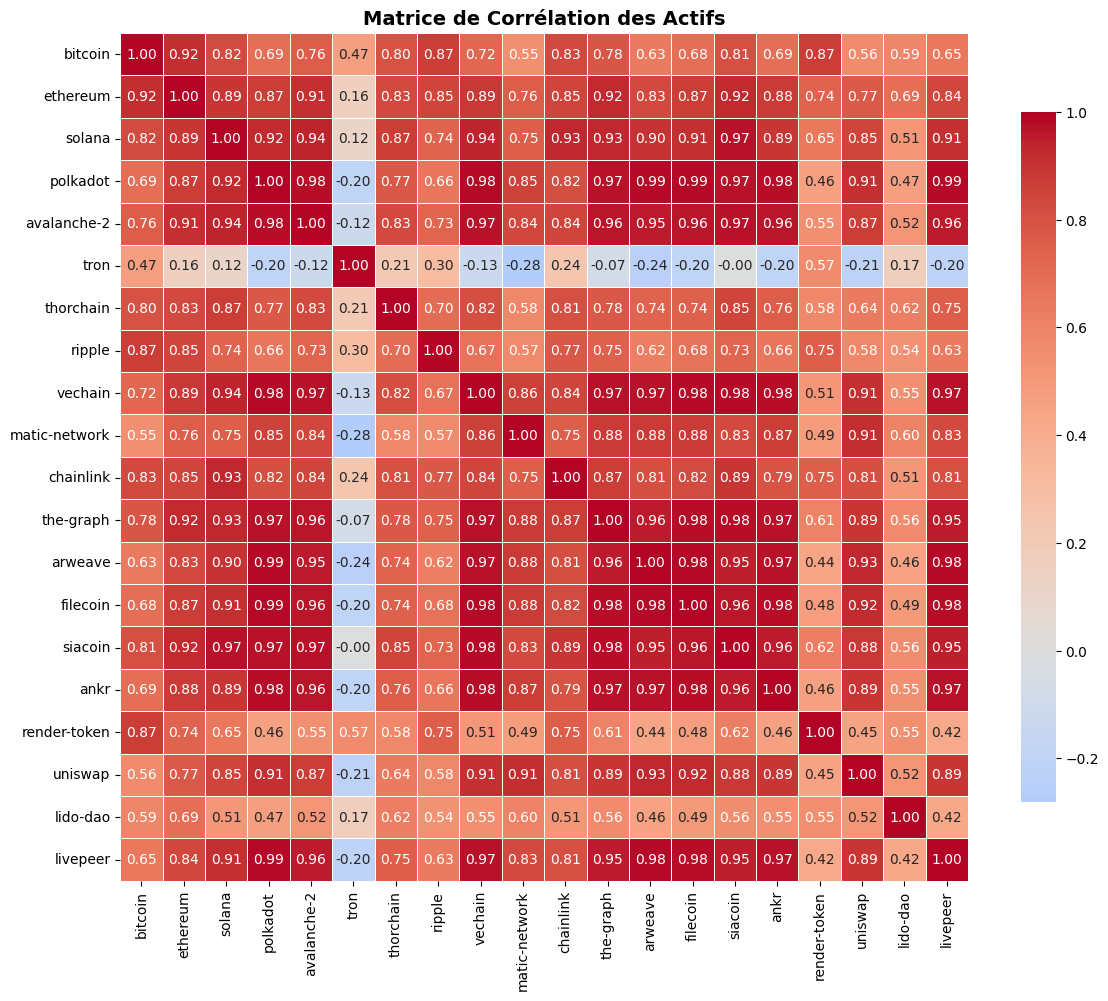

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
